# Word Sense Disambiguation
#### Team: Katherine Schlosser, Jiayao Wang, Linying Zhang

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src')
import format_dat as FMT
import sklearnLDA_jw as LDA
import numpy as np
import os
from os import walk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
def get_N_topics(word, f):
    fin = open(f, 'rt')
    #@RELATION C1321571_C0056208
    CUIs = fin.readline().split()[-1].split("_")
    fin.close()
    return CUIs

In [7]:
f = []
for (dirpath, dirnames, filenames) in walk("../MSHCorpus/"):
    f.extend(filenames)

In [33]:
ALL_KEY_WORDS = []
for _f in f:
    w = _f.replace("_pmids_tagged.arff", "") # abstract.replace("-", " ")
    if len(w.split()) == 1:
        CUIs = get_N_topics(w, "../MSHCorpus/"+_f)
        #print(w, CUIs)
        ALL_KEY_WORDS.append((w, _f, len(CUIs)))
print(len(ALL_KEY_WORDS))

191


In [47]:
import itertools
for p in itertools.permutations(['0', '1', '2']):
    print(p)

('0', '1', '2')
('0', '2', '1')
('1', '0', '2')
('1', '2', '0')
('2', '0', '1')
('2', '1', '0')


In [59]:
def showWordCloud(res):
    for i, wc in enumerate(res):
        LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
        LDA.plt.imshow(wc, interpolation='bilinear')
        LDA.plt.axis("off")
        LDA.plt.show()

In [62]:
RES = []
ErrorWords = []
for w in ALL_KEY_WORDS:
    word, f, n_topics = w
    #print(word, f, n_topics)
    n_of_nearby_word = 30
    source = "MSH"
    word = word.lower()
    try:
        ins = FMT.DoBagOfWords(word.lower(), source, n_topics, "../MSHCorpus/"+f, n_of_nearby_word)
        res, acc = LDA.run(word.lower(), n_topics, source, num_top_words=n_of_nearby_word)
        #print(acc)
        RES.append((word, n_topics, acc))
    except:
        ErrorWords.append(word)

../MSHCorpus/AA_pmids_tagged.arff
(198, 434)
Topic 0: ['aa', 'acid', 'protein', 'amino', '1', '3', 'n', '2', '0', 'diet', '5', 'study', 'p', 'effect', 'digestibility', '4', 'treatment', 'energy', 'synthesis', 'pig', 'fed', 'concentration', 'dietary', 'using', 'g', 'total', 'meal', 'l', 'analysis']
Topic 1: ['aa', 'alcoholic', 'treatment', 'anonymous', 'alcohol', 'study', 'year', 'step', 'recovery', 'help', 'individual', 'method', 'related', 'participant', '12', 'helping', 'program', 'rate', 'group', 'participation', 'problem', 'use', 'outcome', 'alcoholism', 'self', 'drinking', 'social', '1', 'patient']
../MSHCorpus/ADA_pmids_tagged.arff
(198, 235)
Topic 0: ['dental', 'ada', 'association', 'dentist', 'american', 'patient', 'education', 'practice', 'ha', 'professional', 'standard', 'program', 'review', 'care', 'state', 'oral', 'number', 'dentistry', 'health', 'study', 'need', 'procedure', 'background', 'issue', 'research', 'used', 'three', 'clinical', 'profession']
Topic 1: ['ada', 'ade

(170, 295)
Topic 0: ['br', 'brazil', 'study', 'brazilian', 'patient', 'analysis', 'result', '0', 'method', 'used', 'sample', '1', 'scale', 'using', 'health', 'area', 'disease', 'element', 'use', 'objective', 'concentration', 'state', 'version', 'three', 'different', 'obtained', 'cell', 'among', 'reliability']
Topic 1: ['br', 'bromide', 'water', '1', 'ion', '2', 'reaction', 'cl', 'n', 'complex', 'x', 'anion', 'structure', 'effect', '4', '3', 'concentration', 'two', 'acid', 'formation', 'chloride', 'solution', 'l', 'using', 'study', 'halide', 'rate', 'ph', 'ha']
../MSHCorpus/BSA_pmids_tagged.arff
(198, 433)
Topic 0: ['body', 'bsa', 'area', 'patient', 'surface', '1', '0', 'study', 'using', 'method', 'age', 'dose', 'mass', 'group', 'child', 'weight', 'year', 'formula', '2', 'volume', 'analysis', 'result', '5', 'drug', 'effect', 'mean', 'used', 'size', 'calculated']
Topic 1: ['bsa', 'protein', 'serum', 'albumin', 'bovine', '1', 'surface', 'using', 'effect', 'study', '2', 'binding', 'used', 

(185, 356)
Topic 0: ['cement', 'resin', 'glass', 'crown', 'group', 'restoration', 'luting', 'composite', 'study', '1', 'material', 'ionomer', 'mm', 'bond', 'teeth', 'method', 'different', 'strength', '0', 'using', 'post', 'ceramic', 'agent', 'surface', 'system', 'adhesive', 'purpose', '2', 'modified']
Topic 1: ['cement', 'root', 'study', 'tissue', 'mta', 'portland', 'bone', 'dentin', 'teeth', 'calcium', 'mineral', 'cementum', 'material', 'trioxide', 'aggregate', 'dental', 'human', 'used', 'white', 'surface', 'line', 'canal', 'tooth', 'different', 'rat', 'periodontal', 'method', 'filling', 'oxide']
../MSHCorpus/CH_pmids_tagged.arff
(148, 267)
Topic 0: ['patient', 'ch', '0', '4', '1', 'b', 'result', 'genotype', 'cancer', 'soil', 'hbv', 'case', 'hepatitis', 'study', '3', 'c', '2', 'disease', '6', 'p', 'chinese', '7', 'method', 'china', 'sample', 'prevalence', 'n', 'liver', 'chronic']
Topic 1: ['ch', 'china', 'chinese', 'strain', '1', 'isolates', 'data', 'analysis', 'sequence', 'used', 'tw

../MSHCorpus/Crack_pmids_tagged.arff
(163, 286)
Topic 0: ['crack', 'cocaine', 'use', 'drug', 'user', 'hiv', 'study', 'risk', 'among', 'associated', 'treatment', 'sex', 'american', 'african', 'substance', 'patient', 'woman', 'using', '1', 'sample', 'sexual', 'intervention', 'infection', 'condom', 'participant', 'abuse', 'result', '95', 'smoker']
Topic 1: ['crack', 'fracture', 'enamel', 'tooth', 'dentin', 'root', 'teeth', 'human', 'study', 'stress', 'specimen', 'surface', 'treatment', 'growth', 'dental', 'result', 'effect', 'toughness', 'resistance', 'using', 'preparation', '0', 'loading', 'structure', 'glass', 'failure', 'crown', 'junction', 'property']
../MSHCorpus/CRF_pmids_tagged.arff
(198, 424)
Topic 0: ['patient', 'renal', 'crf', 'chronic', 'failure', 'study', 'group', 'method', 'rat', 'result', 'kidney', 'disease', 'level', '1', 'serum', 'treatment', 'plasma', 'dialysis', '2', 'year', 'blood', 'control', 'child', '0', '5', 'effect', 'age', 'risk', '3']
Topic 1: ['crf', 'factor', '

(198, 377)
Topic 0: ['water', 'drinking', '1', '0', 'group', 'rat', 'study', 'intake', 'effect', '2', 'mouse', 'day', '5', 'concentration', 'fluid', 'male', 'system', 'significantly', 'level', '4', 'receptor', '95', '6', 'control', 'result', '3', 'child', 'exposure', 'treatment']
Topic 1: ['alcohol', 'drinking', 'study', 'consumption', 'risk', 'use', 'among', 'health', 'cancer', 'year', 'woman', 'method', 'result', 'associated', 'survey', 'reported', 'behavior', 'age', 'factor', 'smoking', 'intervention', 'level', 'related', 'population', 'sample', 'adult', 'effect', 'drink', 'based']
../MSHCorpus/eCG_pmids_tagged.arff
(198, 476)
Topic 0: ['ecg', 'rat', 'cell', 'study', 'patient', 'follicle', 'chorionic', 'gonadotropin', 'cardiac', 'treatment', 'coronary', 'equine', 'follicular', 'heart', 'ventricular', 'disease', 'ovarian', 'development', 'immature', 'fsh', 'ovary', 'expression', 'myocardial', 'female', 'st', 'wave', 'ovulation', 'effect', 'acute']
Topic 1: ['ecg', 'day', '1', 'treatm

(198, 358)
Topic 0: ['fish', 'specie', 'sample', 'using', 'cell', 'situ', '1', 'cancer', 'method', 'study', 'sequence', 'probe', 'water', 'effect', 'two', 'found', 'lake', 'hybridization', 'activity', 'detection', 'dna', 'concentration', 'fluorescence', 'ha', 'high', 'used', 'different', 'one', 'tissue']
Topic 1: ['fish', 'chromosome', 'patient', 'analysis', 'gene', 'case', 'cell', 'hybridization', 'situ', 'result', 'fluorescence', '2', 'study', 'population', 'acid', '3', 'expression', 'year', 'diagnosis', 'method', 'associated', 'deletion', 'abnormality', 'cytogenetic', 'performed', '4', 'using', '0', 'growth']
../MSHCorpus/Follicle_pmids_tagged.arff
(198, 391)
Topic 0: ['follicle', 'ovarian', 'follicular', '1', 'day', 'group', '2', 'effect', '0', '3', 'ovary', 'treatment', 'oocyte', 'hormone', '5', 'study', 'ovulation', 'growth', 'development', '6', 'number', 'cycle', 'serum', 'rat', 'level', 'woman', 'two', 'vitro', 'n']
Topic 1: ['cell', 'follicle', 'hair', 'stem', 'mouse', 'skin',

(198, 321)
Topic 0: ['ganglion', 'neuron', 'cell', 'nerve', 'intraneural', 'rat', 'system', 'neuronal', 'peroneal', 'model', 'day', 'development', 'group', 'expression', 'used', 'protein', 'sensory', 'nervous', 'body', '2', 'network', 'human', 'terminal', 'control', 'using', 'ha', '4', 'effect', 'pattern']
Topic 1: ['ganglion', 'cyst', 'case', 'cell', 'patient', 'study', 'year', 'wrist', 'report', 'lesion', 'joint', '2', 'diagnosis', 'tissue', 'tumor', 'present', '3', 'gene', 'showed', 'pain', '6', 'peptide', 'treatment', 'mass', 'associated', 'region', 'result', 'old', '1']
../MSHCorpus/Gas_pmids_tagged.arff
(198, 334)
Topic 0: ['gas', 'patient', 'symptom', 'bowel', 'abdominal', '1', 'ibs', 'bloating', 'study', '0', 'intestinal', 'group', '3', '2', 'gastrointestinal', 'production', 'flatulence', 'flatus', '5', 'syndrome', 'subject', 'incontinence', 'pain', 'effect', 'colonic', 'hydrogen', 'woman', 'control', 'result']
Topic 1: ['gas', 'phase', 'ion', '1', 'two', 'method', 'using', 'st

(235, 406)
Topic 0: ['methamphetamine', 'drug', 'ice', 'use', 'patient', 'abuse', 'associated', 'effect', 'injection', 'study', 'crystal', 'smoking', 'acute', 'ha', 'may', 'treatment', 'form', 'rat', 'stimulant', 'case', 'risk', 'related', 'state', 'problem', 'clinical', 'cocaine', 'result', 'also', 'increase', 'data']
Topic 1: ['ice', '0', 'water', 'temperature', 'using', 'effect', 'study', 'protein', 'model', 'c', 'ha', 'result', 'change', 'method', '3', 'formation', '5', 'degree', 'concentration', '1', 'activity', 'nucleation', 'time', 'surface', 'freezing', 'group', 'sample', 'phase', 'solution']
Topic 2: ['1', 'il', 'ice', '1beta', 'cell', 'caspase', 'enzyme', 'interleukin', 'converting', '18', 'expression', 'inhibitor', 'mouse', 'apoptosis', 'activity', '2', 'protein', 'patient', 'induced', 'gene', 'beta', 'activation', 'level', 'cytokine', 'effect', 'mrna', '3', 'method', 'receptor']
../MSHCorpus/INDO_pmids_tagged.arff
(122, 254)
Topic 0: ['l', 'indo', 'group', 'response', 'ach'

(161, 295)
Topic 0: ['leishmania', 'vaccine', 'leishmaniasis', 'dog', 'visceral', 'response', 'cell', 'l', 'canine', 'antigen', 'major', 'protein', 'parasite', 'mouse', 'donovani', 'immune', 'study', 'infected', 'trial', 'cutaneous', 'infection', 'human', 'candidate', 'infantum', 'balbc', 'vaccination', 'immunity', 'test', 'ha']
Topic 1: ['leishmaniasis', 'disease', 'leishmania', 'vector', 'specie', 'treatment', 'patient', 'case', 'control', 'study', 'drug', 'cutaneous', 'activity', 'used', 'infection', 'area', 'endemic', 'parasite', 'pcr', 'ha', 'method', 'clinical', 'vl', 'visceral', 'agent', 'host', 'region', 'diagnosis', 'result']
../MSHCorpus/lens_pmids_tagged.arff
(297, 475)
Topic 0: ['lens', 'eye', 'anterior', 'cell', 'intraocular', 'iol', 'cataract', 'capsular', 'capsule', 'case', 'purpose', 'membrane', 'protein', 'study', 'patient', 'method', 'year', 'implantation', 'age', 'posterior', 'surgery', 'epithelial', 'mouse', 'chamber', 'human', 'result', 'visual', 'laser', 'corneal'

(166, 314)
Topic 0: ['mr', 'spectroscopy', 'magnetic', 'resonance', 'patient', 'study', '1h', 'brain', 'using', 'method', 'proton', '1', 'imaging', '3', 'result', 'control', 'metabolite', 'tumor', '0', 'level', 'mri', 'subject', 'performed', 'healthy', '5', 'vivo', 'ratio', 'metabolic', 'n']
Topic 1: ['mr', 'syndrome', 'rosenthal', 'melkersson', 'case', 'patient', 'facial', 'year', 'swelling', 'granulomatous', 'orofacial', 'cheilitis', 'recurrent', 'diagnosis', 'disease', 'edema', 'palsy', 'lip', 'granulomatosa', 'form', 'tongue', 'report', 'triad', 'rare', 'characterized', 'treatment', 'may', 'symptom', 'old']
../MSHCorpus/NBS_pmids_tagged.arff
(146, 346)
Topic 0: ['cell', 'nb', 'syndrome', 'nijmegen', 'breakage', 'patient', 'nbs1', 'mutation', 'line', 'growth', 'dna', 'gene', 'cancer', 'expression', 'protein', 'human', 'chromosomal', 'level', 'recessive', 'disorder', 'increased', 'microcephaly', 'found', 'double', 'malignancy', 'chromosome', 'repair', 'instability', 'clinical']
Topic

(491, 1020)
Topic 0: ['artery', 'cerebral', 'pca', 'posterior', 'patient', 'aneurysm', 'flow', 'case', 'territory', 'year', 'blood', 'right', 'stroke', 'left', 'method', 'angiography', 'mca', 'carotid', 'mean', 'segment', 'infarction', 'response', 'study', 'pattern', 'occlusion', 'clinical', 'feature', 'disease', 'circulation']
Topic 1: ['5', 'ht', 'pca', 'p', 'rat', 'chloroamphetamine', 'effect', 'serotonin', 'mgkg', 'receptor', '2', 'induced', 'administration', 'brain', '1', 'study', 'level', 'serotonergic', '10', '3', 'antagonist', 'axon', 'dose', 'treatment', 'day', 'expression', 'injection', 'present', 'significantly']
Topic 2: ['analysis', 'component', 'principal', 'pca', 'different', 'data', 'method', 'using', 'result', 'sample', 'used', 'cell', 'based', 'factor', 'model', 'source', 'three', 'two', 'system', 'profile', 'obtained', 'difference', 'study', 'applied', 'showed', '0', 'relationship', 'concentration', 'related']
Topic 3: ['patient', 'pca', 'analgesia', 'controlled', 'g

(198, 446)
Topic 0: ['plaque', 'amyloid', 'disease', 'ad', 'alzheimer', 'abeta', 'mouse', 'beta', 'brain', 'protein', 'transgenic', 'model', 'level', 'associated', 'effect', 'pathology', 'cell', 'peptide', 'patient', 'human', 'age', 'study', 'ha', 'pathological', 'deposition', 'imaging', 'cognitive', 'senile', '2', 'formation']
Topic 1: ['plaque', 'study', 'group', 'patient', 'oral', 'dental', 'subject', 'control', 'clinical', 'method', 'periodontal', 'caries', 'effect', 'test', 'result', 'gingival', '0', 'child', 'sample', 'treatment', 'subgingival', 'using', 'p', 'teeth', 'gingivitis', 'risk', 'health', 'bacteria', 'index']
../MSHCorpus/Platelet_pmids_tagged.arff
(198, 431)
Topic 0: ['platelet', 'patient', 'cell', 'study', 'disease', 'blood', 'count', 'method', 'factor', 'liver', 'risk', 'role', 'may', 'background', 'protein', 'effect', 'associated', 'chronic', 'activation', 'function', 'objective', 'using', 'membrane', 'syndrome', 'response', 'treatment', 'receptor', 'result', 'acut

(198, 320)
Topic 0: ['rdna', 'dna', 'recombinant', 'human', 'cell', 'protein', 'patient', 'product', 'yeast', 'transcription', 'study', 'rna', 'derived', 'ha', '2', 'strain', 'activity', 'gene', 'production', '5', 'method', 'plasmid', 'histone', 'two', 'technology', '1', 'assay', 'antibody', 'used']
Topic 1: ['rdna', 'sequence', 'gene', 'specie', 'dna', 'analysis', '5', 'rrna', '16', 'using', 'region', 'two', 'strain', 'fragment', 'phylogenetic', 'chromosome', 'ribosomal', 'within', 'clone', 'pcr', 'result', 'molecular', 'rna', 'genus', 'diversity', 'different', 'group', 'based', 'isolated']
../MSHCorpus/README.txt
Error   contains three fields []
Error   M2 []
Error      author={Jimeno-Yepes []
(0,)
../MSHCorpus/Respiration_pmids_tagged.arff
(198, 389)
Topic 0: ['respiration', 'effect', 'respiratory', '1', 'cell', 'induced', '0', 'oxygen', 'leaf', 'motion', 'result', 'mitochondrial', 'mitochondrion', 'c', 'patient', 'rat', 'rate', 'using', '2', 'time', 'liver', '5', 'tumor', 'o2', 're

(198, 380)
Topic 0: ['staph', 'aureus', 'staphylococcus', 'method', 'isolates', 'strain', 'identification', 'test', 'system', 'specie', 'staphylococci', 'api', 'negative', 'resistant', 'result', 'coagulase', 'patient', 'identified', 'infection', 'gene', 'mrsa', 'pcr', 'tested', '5', 'positive', 'study', 'reference', 'staphylococcal', 'resistance']
Topic 1: ['staph', 'aureus', 'staphylococcus', 'strain', 'infection', 'milk', 'mastitis', 'isolated', 'group', 'cow', '1', 'sample', 'negative', '4', '2', 'coagulase', 'specie', 'staphylococci', 'study', '5', 'result', 'treatment', '6', 'bacteria', '3', 'teat', 'pathogen', 'three', 'streptococcus']
../MSHCorpus/STEM_pmids_tagged.arff
(198, 350)
Topic 0: ['stem', 'plant', 'cell', 'leaf', 'extract', 'activity', 'study', 'showed', 'root', '1', 'growth', 'result', 'bark', 'analysis', 'water', 'specie', 'gene', 'method', 'content', 'acid', 'b', 'xylem', 'effect', 'concentration', 'different', 'rat', 'tissue', 'tree', 'used']
Topic 1: ['stem', 'ele

(198, 468)
Topic 0: ['tnt', 'trinitrotoluene', 'explosive', '246', 'soil', 'muscle', 'troponin', 'detection', 'using', '5', 'used', 'effect', 'gene', 'water', 'protein', 'two', 'compound', 'study', 'surface', 'different', '1', '0', 'rdx', 'ha', 'analysis', 'mutation', 'expression', 'sample', 'c']
Topic 1: ['patient', 'tnt', 'troponin', 'cardiac', 'myocardial', '0', 'heart', 'study', 'level', 'result', 'coronary', '1', 'method', 'acute', 'group', 'ctnt', '2', 'marker', 'h', 'n', 'infarction', 'value', 'mb', 'elevation', 'ck', 'measured', 'nt', 'ac', 'protein']
../MSHCorpus/Tolerance_pmids_tagged.arff
(198, 403)
Topic 0: ['cell', 'tolerance', 'immune', 'response', 'antigen', 'disease', 'dc', 'mouse', 'tumor', 'regulatory', 'b', 'function', 'receptor', 'specific', 'role', 'tregs', 'peripheral', 'tissue', '1', 'expression', 'human', 'system', 'study', 'dendritic', 'inflammatory', 'autoimmune', 'ha', 'induction', 'mechanism', 'treg']
Topic 1: ['tolerance', 'effect', 'morphine', 'receptor', 

Topic 0: ['gene', 'syndrome', 'wb', 'williams', 'beuren', 'region', 'deletion', '7q11', '23', 'chromosome', 'disorder', 'human', 'family', 'elastin', '5', 'caused', 'deleted', 'cell', '11p15', 'factor', 'haploinsufficiency', 'cognitive', 'mouse', 'development', 'wiedemann', 'beckwith', 'within', 'chromosomal', '1', 'transcription']
Topic 1: ['wb', 'syndrome', 'patient', 'williams', 'beuren', 'beckwith', 'wiedemann', 'case', 'clinical', 'two', 'child', 'group', 'study', 'age', 'year', 'chromosome', 'individual', 'subject', 'genetic', 'normal', 'mental', 'analysis', 'ha', 'found', '1', 'reported', 'deletion', 'result', 'molecular']
../MSHCorpus/WT1_pmids_tagged.arff
(198, 387)
Topic 0: ['wt1', 'tumor', 'wilms', 'gene', 'expression', 'patient', 'cell', '1', 'mutation', 'protein', 'syndrome', 'study', 'cancer', 'leukemia', 'development', 'role', 'factor', 'renal', 'suppressor', 'kidney', 'acute', 'carcinoma', 'result', 'transcription', 'aml', 'myeloid', 'signaling', 'growth', 'molecular']


(array([13., 10.,  8., 13., 11., 13., 18., 18., 29., 46.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Patch objects>)

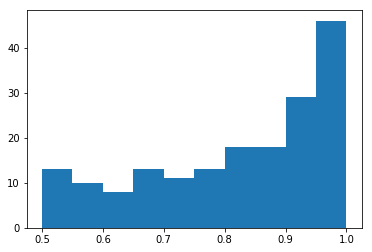

In [63]:
np.mean([x[2] for x in RES])
LDA.plt.hist([x[2] for x in RES])

In [64]:
np.mean([x[2] for x in RES])

0.8210808452193704

In [65]:
ErrorWords

['benchmark_mesh.txt',
 'cls',
 'coffee',
 'cpdd',
 'don',
 'erythrocytes',
 'gamma-interferon',
 'npc',
 'readme.txt',
 'sars',
 'ss',
 'tax']

In [24]:
word = "cold"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, 3, n_of_nearby_word)

../MSHCorpus/cold_pmids_tagged.arff


In [25]:
pkl = FMT.pickle.load(open("../output/cold_MSH/dict.pkl", "rb"))
data = LDA.np.load("../output/cold_MSH/train.npy", allow_pickle=True, encoding="bytes")
data = LDA.np.array([list(word) for word in data], dtype=np.float32)
print(data)

[[1. 2. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
word="cold"; num_topics=3; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

(260, 464)
Topic 0: ['cold', 'protein', 'stress', 'temperature', 'expression', 'c', 'study', 'induced', 'gene', 'cell', 'pain', 'growth', 'rat', 'degree', 'effect', 'plant', 'group', 'model', 'condition', 'ha', 'low', 'level', 'shock', 'acid', 'mechanism', 'response', 'tissue', 'role', 'two']
Topic 1: ['cold', 'patient', 'disease', 'chronic', 'lung', 'obstructive', '1', '2', '0', '5', 'study', 'method', 'change', 'pulmonary', 'group', 'level', '4', 'result', 'clinical', 'day', '6', 'c', '3', 'control', 'used', 'significant', 'without', 'bronchial', 'year']
Topic 2: ['cold', 'common', 'child', 'cough', 'medication', 'infection', 'study', 'respiratory', 'symptom', 'virus', 'exacerbation', 'use', 'patient', 'asthma', 'copd', 'influenza', 'treatment', 'objective', 'disease', 'nasal', 'associated', 'acute', 'effect', 'method', 'year', 'chronic', 'cause', 'clinical', 'counter', 'ha']
Accuracy:  0.7307692307692307


### Word Cloud For Each Word Sense

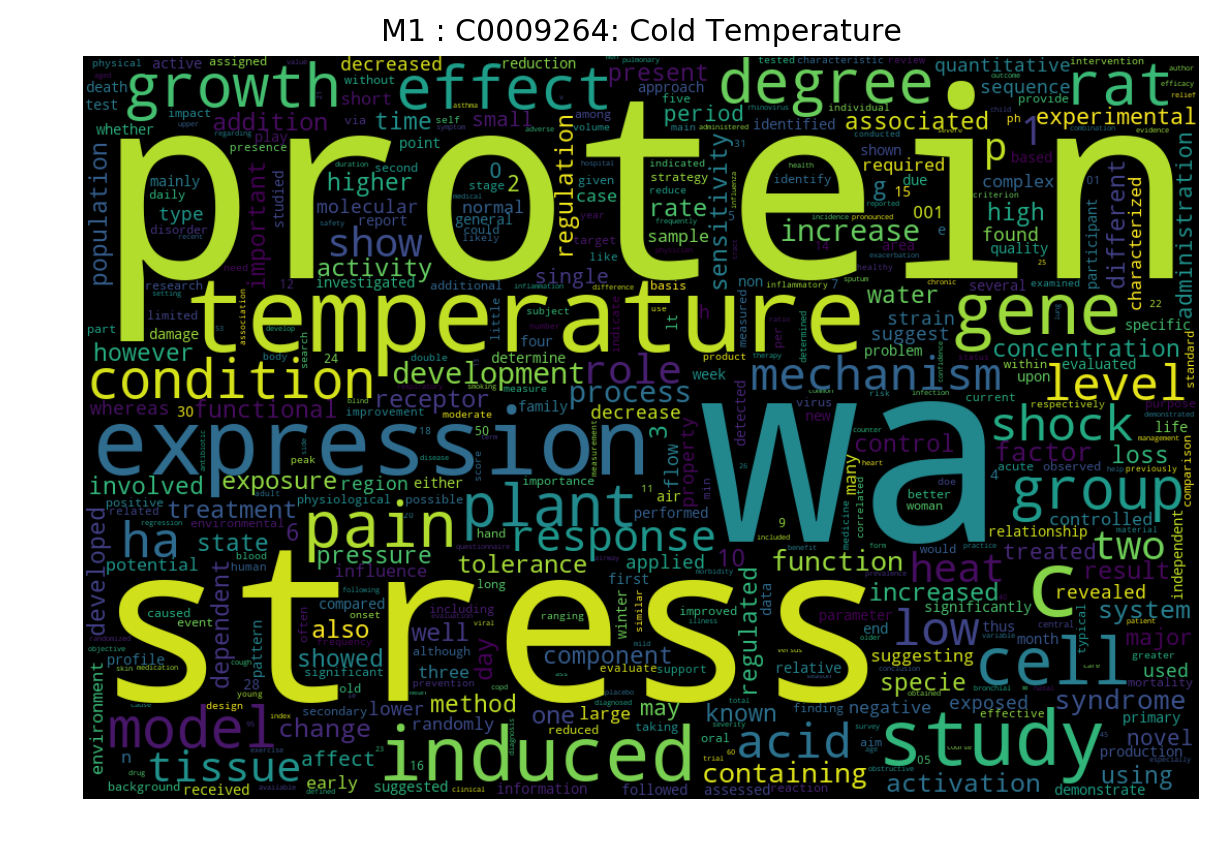

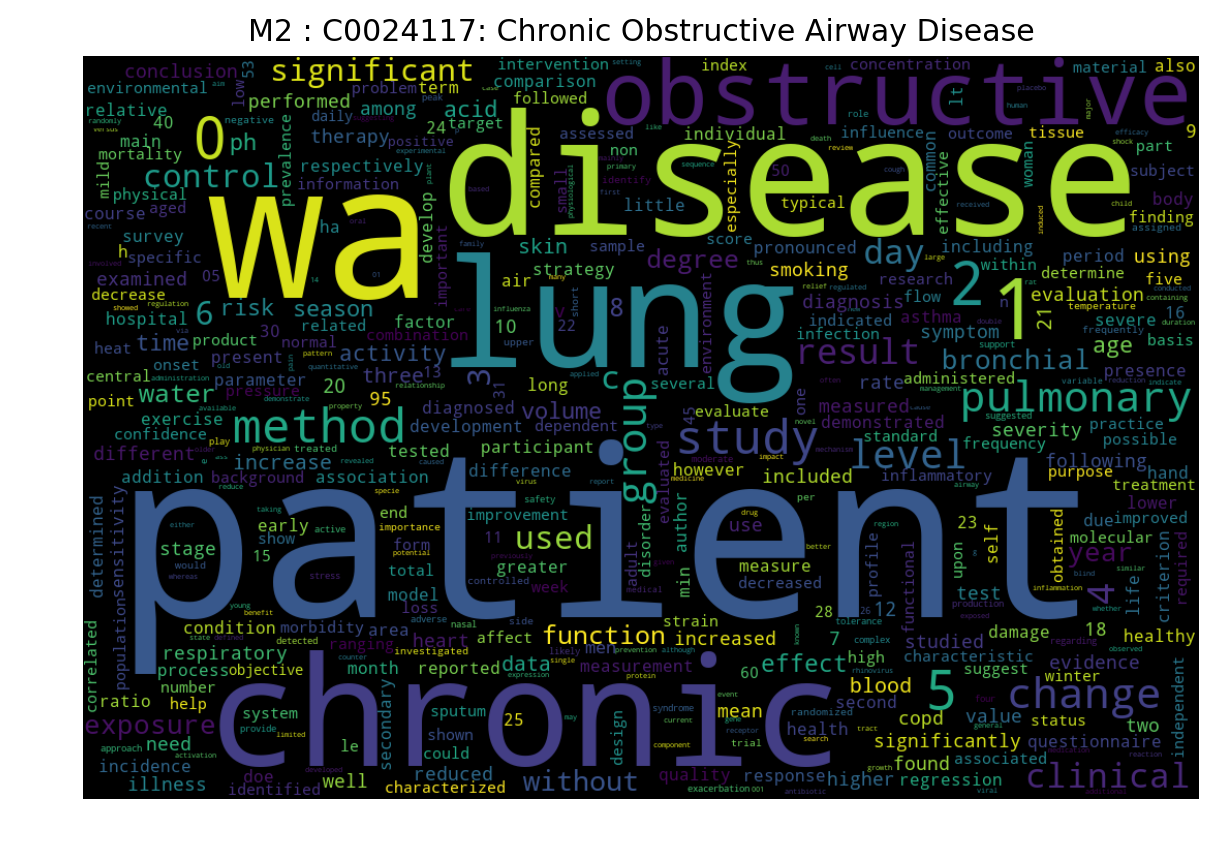

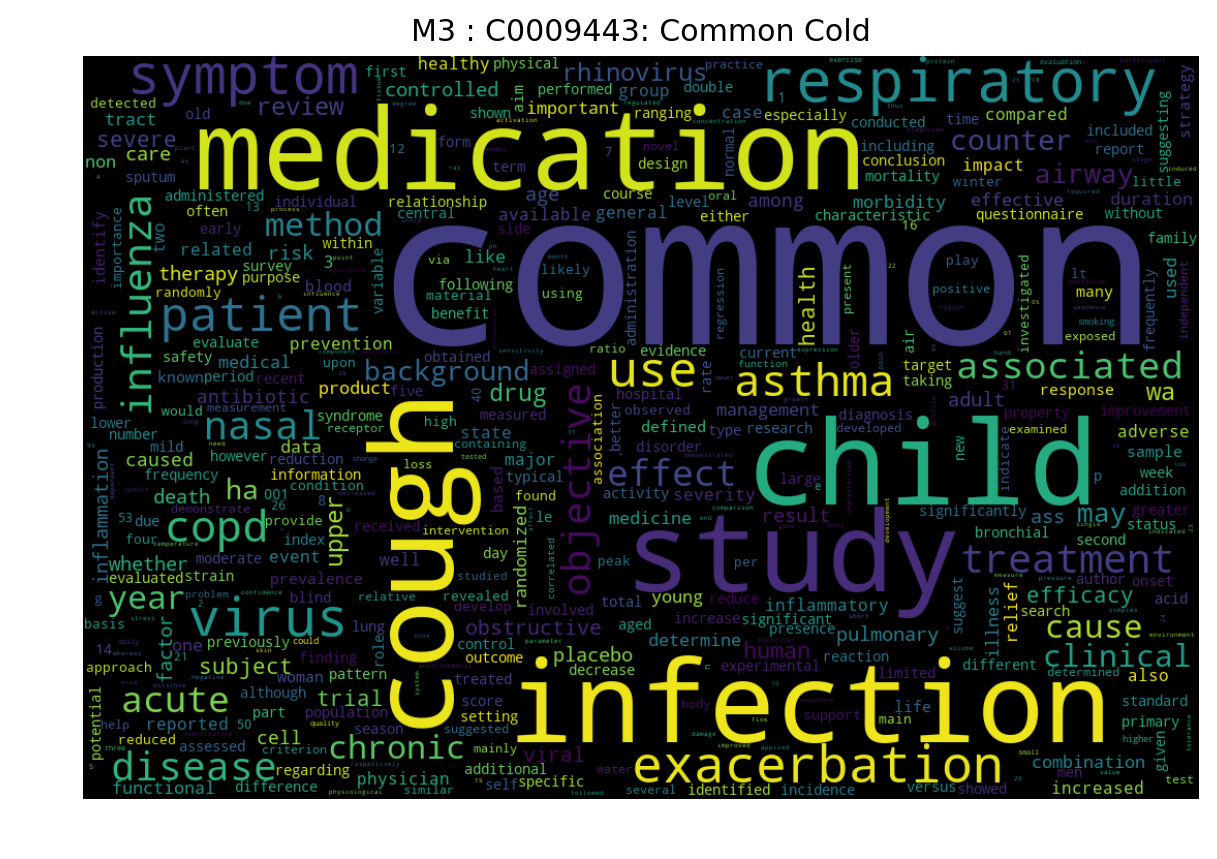

In [28]:
Senses = ["C0009264: Cold Temperature", "C0024117: Chronic Obstructive Airway Disease", "C0009443: Common Cold"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

In [38]:
word = "ventricle"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [39]:
word="ventricle"; num_topics=2; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

(198, 428)
Topic 0: ['ventricle', 'brain', 'ventricular', 'patient', 'model', 'study', 'cell', 'volume', 'method', '1', 'result', '3', 'lateral', 'cerebral', 'mri', 'fluid', 'system', 'normal', 'using', 'image', 'mouse', 'hydrocephalus', 'csf', 'flow', 'imaging', 'case', 'year', '2', 'adult']
Topic 1: ['ventricle', 'left', 'ventricular', 'heart', 'right', 'cardiac', 'function', 'expression', 'myocardial', 'study', 'change', 'lv', 'rat', 'gene', 'effect', 'group', 'result', 'significant', 'patient', 'protein', '0', 'increased', 'level', 'wall', 'channel', 'cell', 'rv', 'n', 'compared']
Accuracy:  0.8888888888888888


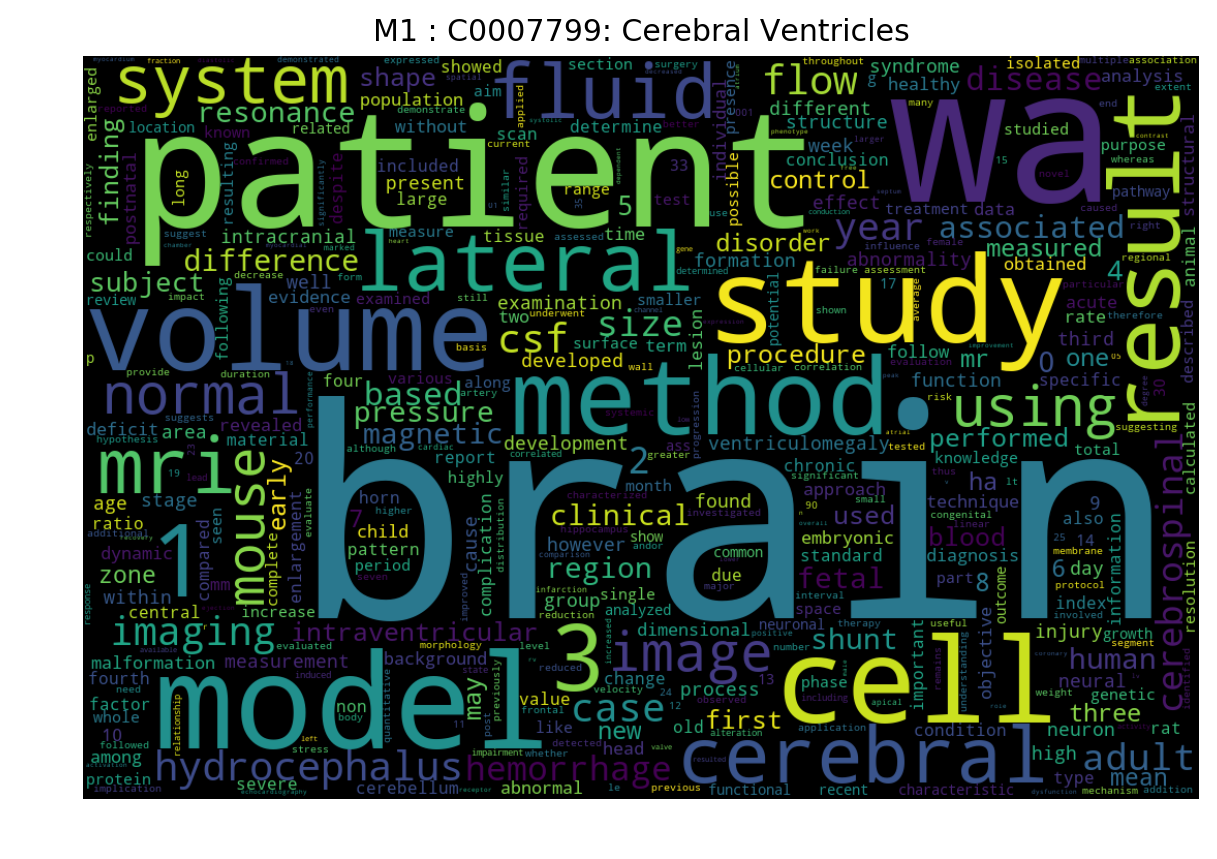

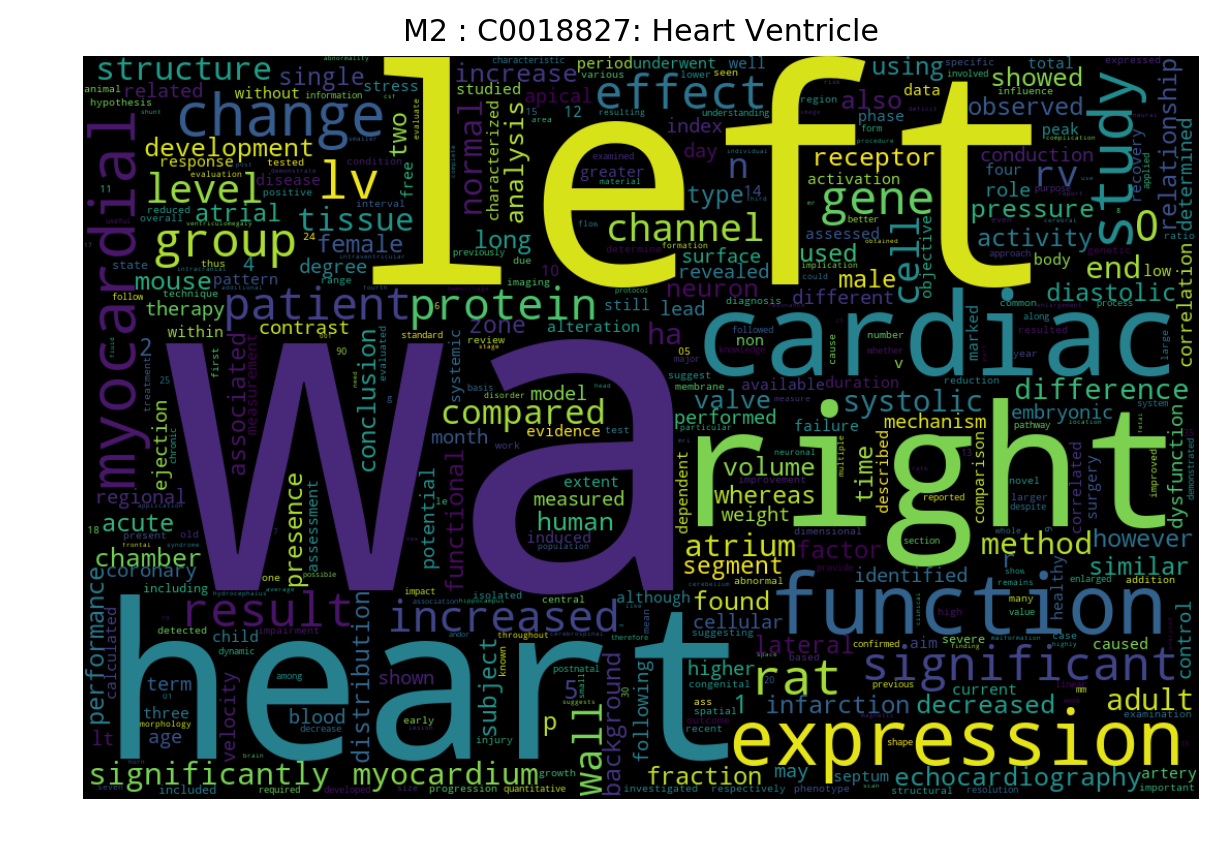

In [40]:
Senses = ["C0007799: Cerebral Ventricles", "C0018827: Heart Ventricle"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

# Perform on Pediatrics

In [14]:
word = "ventricle"
n_of_nearby_word = 10
source = "Ped"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [15]:
word="ventricle"; num_topics=2; source="Ped"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word, verbose=1)

(59, 94)
Topic 0: ['infant', 'ventricle', 'ventricular', '2', 'age', 'left', '1', 'time', 'brain']
Topic 1: ['ventricle', 'patient', 'child', 'right', 'single', 'disease', 'pulmonary', 'cardiac', 'heart']
Accuracy:  0.7288135593220338


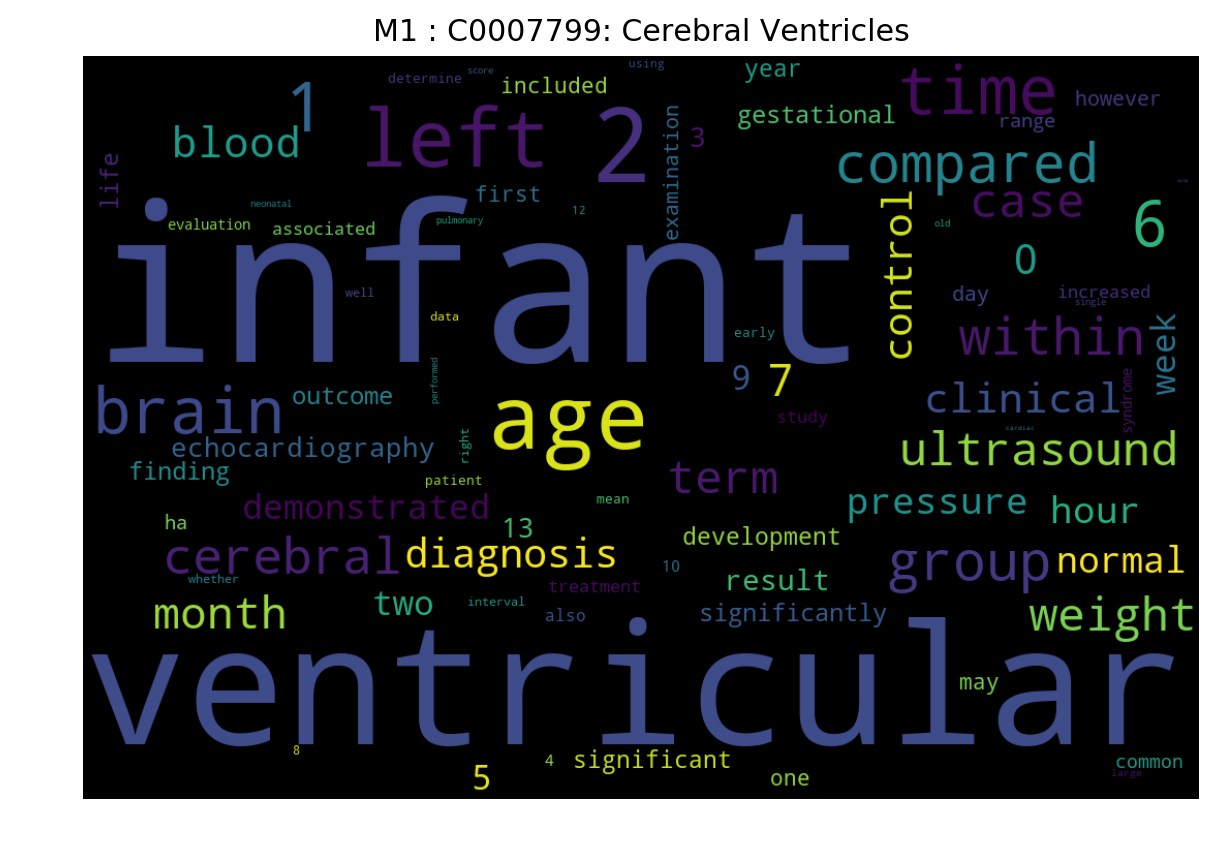

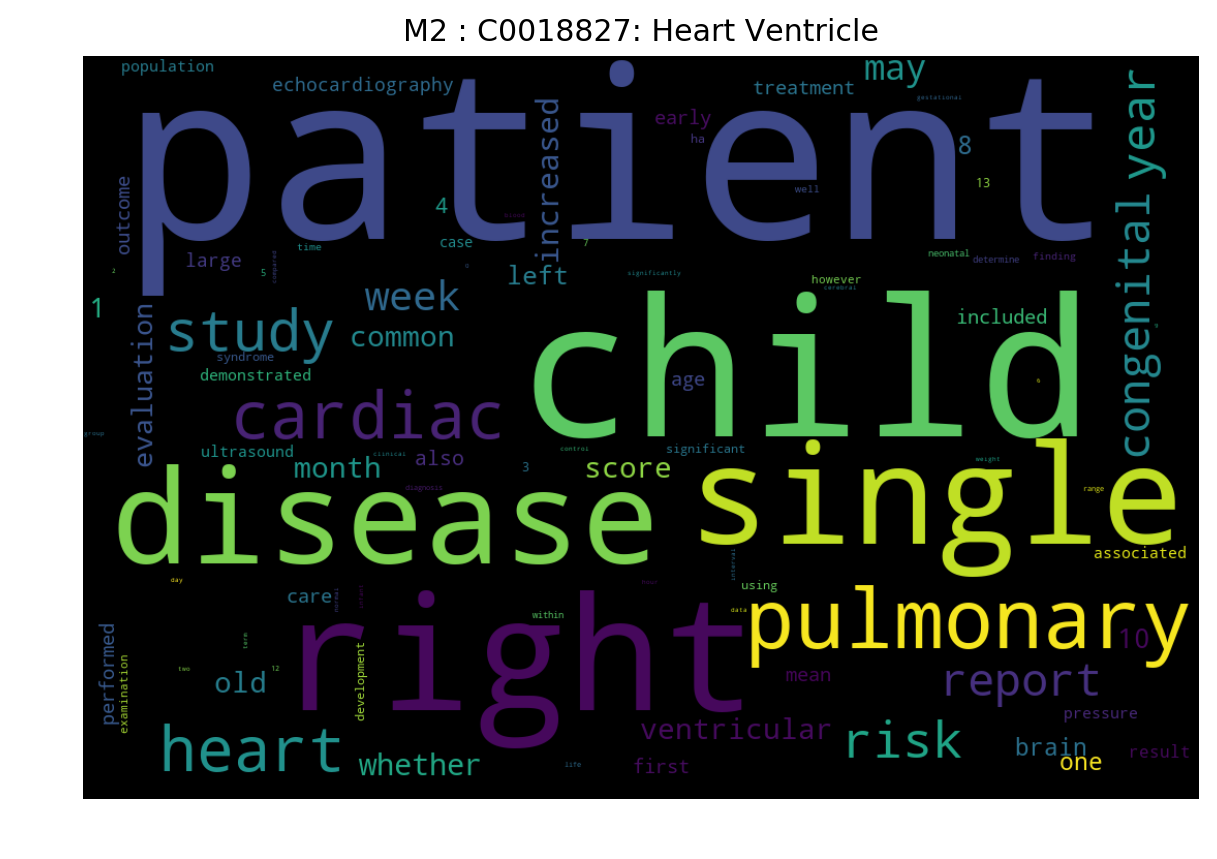

In [16]:
Senses = ["C0007799: Cerebral Ventricles", "C0018827: Heart Ventricle"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

## What's the best window size?

In [28]:
word="cold"; num_topics=3; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)


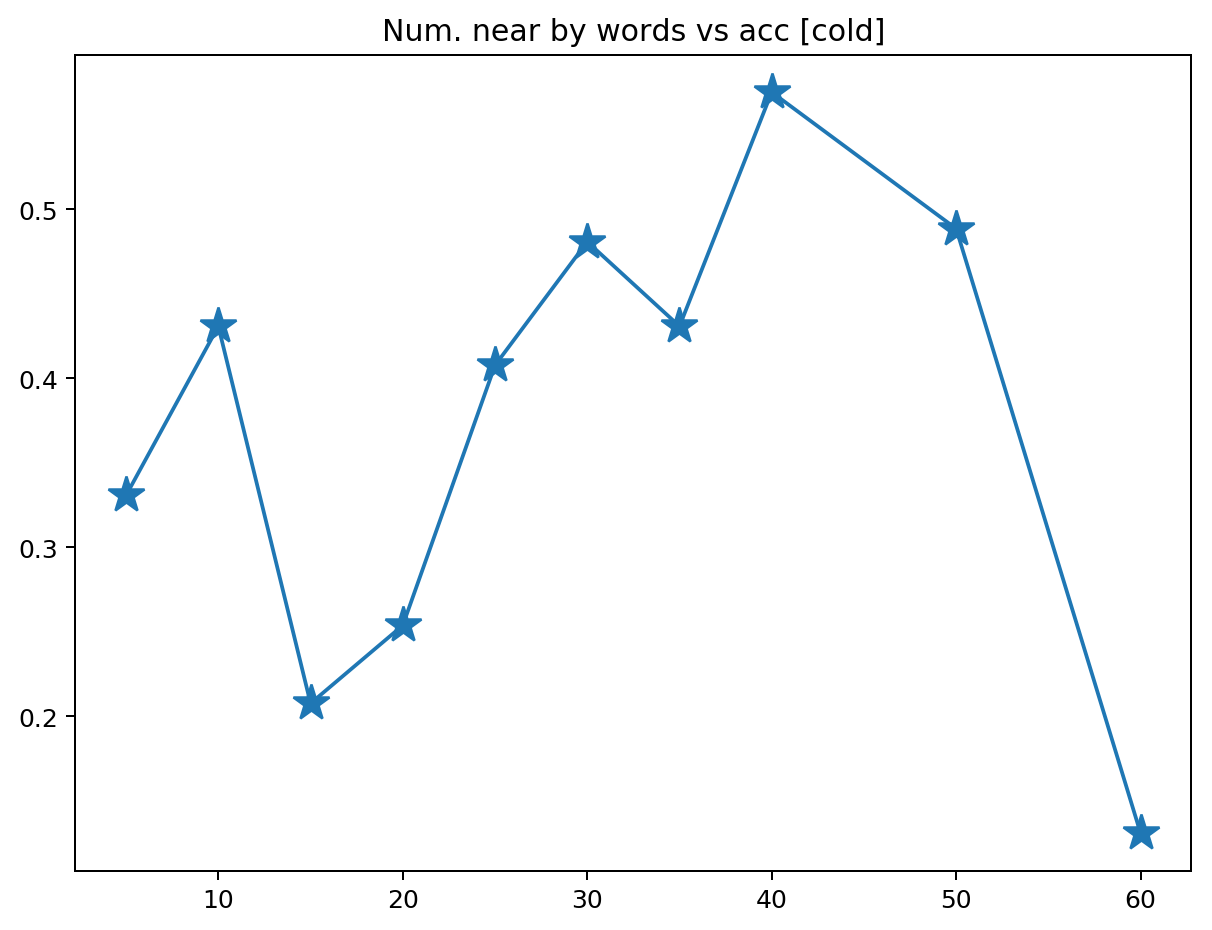

In [29]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [cold]")
LDA.plt.show()

In [19]:
word = "ventricle"; num_topics=2; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)


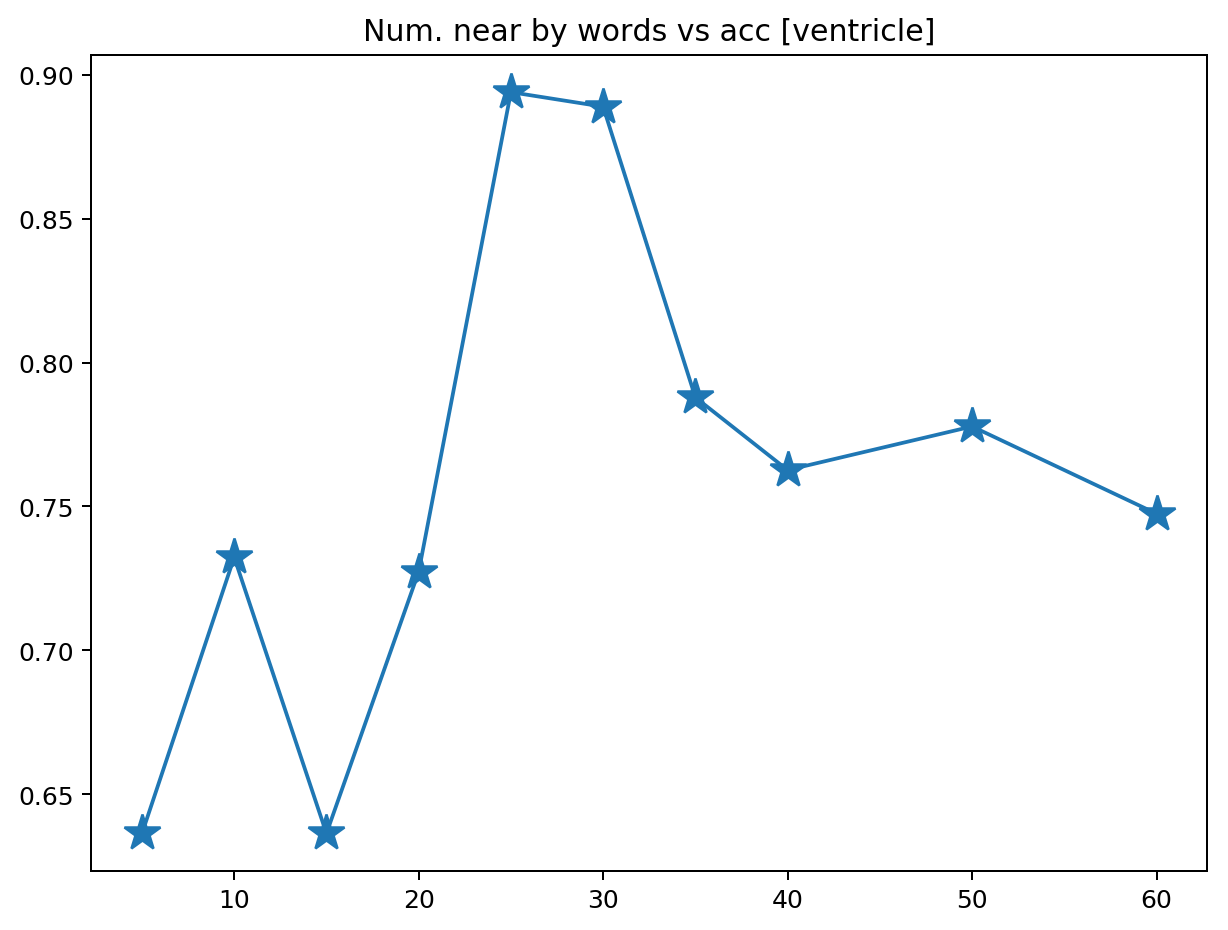

In [20]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [ventricle]")
LDA.plt.show()

# Compared to other methods

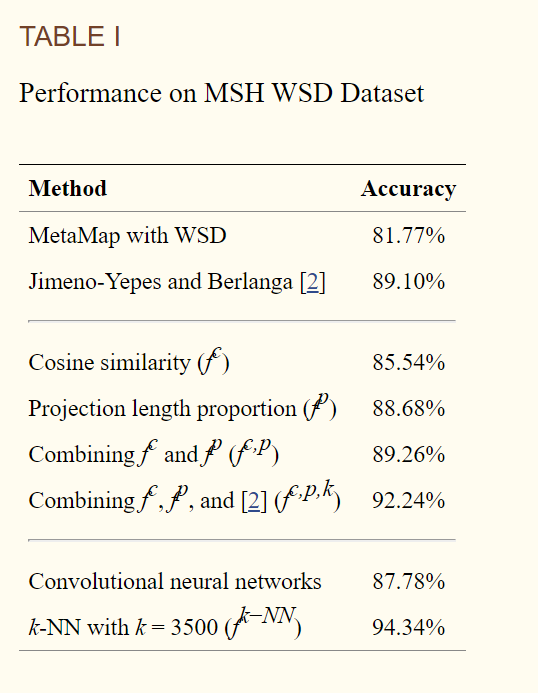

## What we learned
##### 1. Word sense can be represented by its nearby words
##### 2. Best number of nearby words differ with different words, could have relationship with number of senses it has.

## What needs to be done
##### 1. Use word embeddings to automaticlly match word sense with concept sense.
##### 2. Better preprocessing is needed.
##### 3. Run our model on all ambiguatious words from UMLS with CUIs >= 2.

### Code and Data Avaiable at https://github.com/zhangly811/WordSenseDetection